# Данные

In [1]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np

In [2]:
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

In [3]:
from lib2.MeasurementResult import *
from lib2.SingleToneSpectroscopy import *
from lib import data_management as dm

In [4]:
#распаковка
import pickle
import numpy as np
with open('/home/alena/Science/МИСИС/02-31-27 - III-anticrossing/III-anticrossing_raw_data.pkl', 'rb') as f:
#with open('/home/alena/Science/МИСИС/02-21-22 - II-anticrossing/II-anticrossing_raw_data.pkl', 'rb') as f:
    d = pickle.load(f)
    print(type(d))#тип данных словари
    #print(d)

<class 'dict'>


In [5]:
Frequency=d['Frequency [Hz]']
#print(Frequency)
print(type(Frequency))
print(np.shape(Frequency))

<class 'numpy.ndarray'>
(101,)


In [6]:
Current=d['Current [A]']
print(type(Current))
print(np.shape(Current))

<class 'numpy.ndarray'>
(51,)


In [7]:
Sdata=(d['data'])
print(type(Sdata))
print(np.shape(Sdata))

<class 'numpy.ndarray'>
(51, 101)


# Однотонная спектроскопия

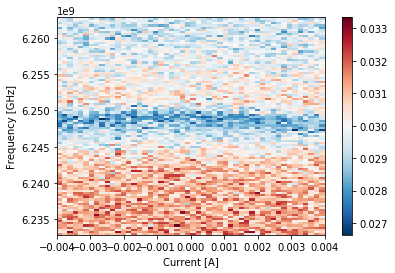

In [9]:
plt.pcolormesh(Current, Frequency, abs(Sdata.T),cmap='RdBu_r')
plt.xlabel("Current [A]")
plt.ylabel("Frequency [GHz]")
z = plt.colorbar()
z.set_label('', rotation=90)

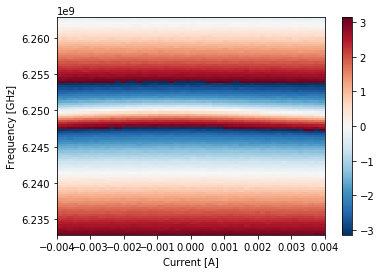

In [10]:
plt.pcolormesh(Current, Frequency, np.angle(Sdata.T),cmap='RdBu_r')
plt.xlabel("Current [A]")
plt.ylabel("Frequency [GHz]")
z = plt.colorbar()
z.set_label('', rotation=90)

In [8]:
#при фиксированном токе находим значение частот и пропускания
i=0
S21=(d['data']).T[:,i]
print(type(S21))
print(np.shape(S21))

<class 'numpy.ndarray'>
(101,)


# Зависимость амплитуды от частоты

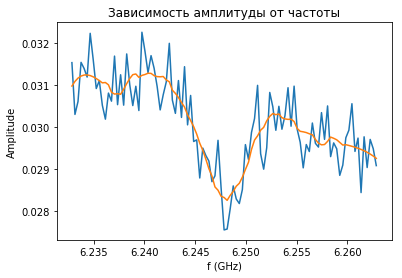

In [27]:
fig = plt.figure()
plt.plot(Frequency*1e-9, abs(S21))
plt.plot(Frequency*1e-9, savgol_filter(abs(S21),21,3))
plt.xlabel('f (GHz)')
plt.ylabel('Amplitude')
plt.title('Зависимость амплитуды от частоты')
plt.show()

In [28]:
fig.savefig("Amp.png")

# Зависимость фазы от частоты

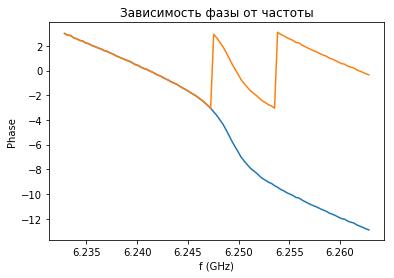

In [29]:
fig = plt.figure()
plt.plot(Frequency*1e-9, np.unwrap(np.angle(S21)))
plt.plot(Frequency*1e-9, np.angle(S21))
#plt.plot(Frequency, np.angle(S21))
plt.xlabel('f (GHz)')
plt.ylabel('Phase')
plt.title('Зависимость фазы от частоты')
plt.show()

In [15]:
fig.savefig("F.png")

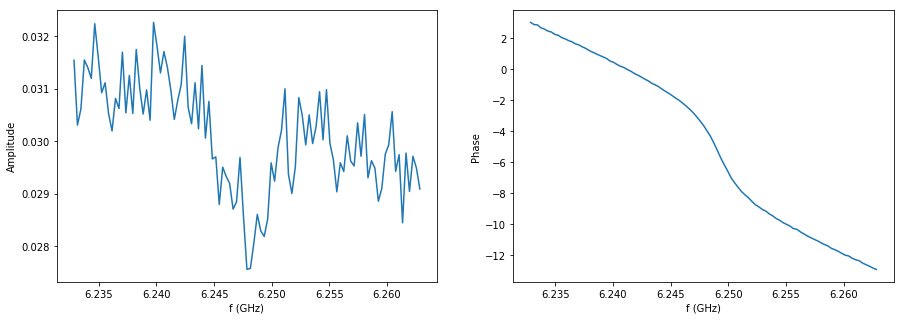

In [16]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Frequency*1e-9, abs(S21))
#plt.plot(Frequency, savgol_filter(abs(S21),21,3))
plt.xlabel('f (GHz)')
plt.ylabel('Amplitude')
#plt.title('Зависимость амплитуды от частоты')        
plt.subplot(122)
plt.plot(Frequency*1e-9, np.unwrap(np.angle(S21)))
#plt.plot(Frequency, np.angle(S21))
plt.xlabel('f (GHz)')
plt.ylabel('Phase')
#plt.title('Зависимость фазы от частоты')
plt.show()

In [18]:
fig.savefig("A&F.png")

# Фитирование  S21 с помощью circlefit

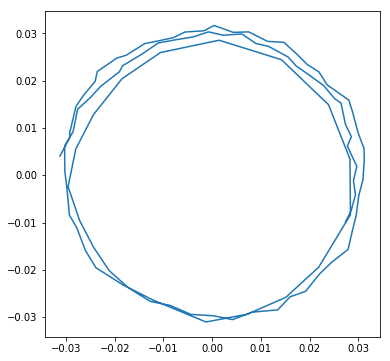

In [43]:
fig = plt.figure(figsize=(6,6))

plt.plot(np.real(S21), np.imag(S21))
plt.show()

In [12]:
fig.savefig("S21.pdf")

In [13]:
from circlefit import *

In [14]:
Data=circlefit()

In [15]:
fitcircle=Data._fit_circle(S21)
print(fitcircle)

(7.44135489711332e-05, 0.00011223347332340371, 0.03133546726786301)


In [16]:
#рисуем окружность
def drawCircles (axes):
    circle1 = matplotlib.patches.Circle((fitcircle[0], fitcircle[1]), radius=fitcircle[2], fill=None)
    axes.add_patch(circle1)


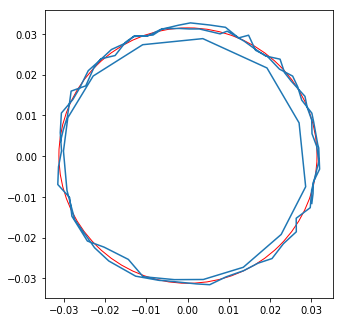

In [24]:
fig = plt.figure(figsize=(100,100))
axes = fig.add_axes([0, 0, 0.04, 0.04])
circle1 = matplotlib.patches.Circle((fitcircle[0], fitcircle[1]), radius=fitcircle[2],color='r',fill=None)
axes.add_patch(circle1)
plt.plot(np.real(S21), np.imag(S21))
#axes.legend()
plt.show()

# Фитирование резонатора c помощью resonator_tools

In [9]:
from resonator_tools import circuit
from resonator_tools import utilities
from resonator_tools import circlefit

In [45]:
from importlib import reload
reload(circuit)

<module 'resonator_tools.circuit' from '/home/alena/anaconda3/lib/python3.7/site-packages/resonator_tools/circuit.py'>

In [46]:
reload(circlefit)

<module 'resonator_tools.circlefit' from '/home/alena/anaconda3/lib/python3.7/site-packages/resonator_tools/circlefit.py'>

In [47]:
reload(utilities)

<module 'resonator_tools.utilities' from '/home/alena/anaconda3/lib/python3.7/site-packages/resonator_tools/utilities.py'>

In [48]:
DATA=circuit.reflection_port(f_data=Frequency, z_data_raw=S21)

In [49]:
#Data=utilities.save_load()

In [50]:
#Data.add_data(Frequency, S21)

In [51]:
#DATA.get_delay(f_data=Frequency, z_data=S21)

In [52]:
DATA.get_delay(Frequency, S21)

(1.1766175703308829e-07,
 [0.8919805045126472,
  0.0,
  -0.14737707253418833,
  1.7952692764337666e-08,
  6248401160.446811,
  -2007.326502075396])

In [53]:
#DATA.circlefit._periodic_boundary()

In [54]:
DATA.do_calibration(Frequency, S21)

(1.1766175703308829e-07,
 0.03116566273289428,
 -0.6580541252046412,
 6235949688.892057,
 1047.8779085527294,
 0.0,
 6248401160.446811)

In [55]:
S21_sim=DATA.autofit()

In [56]:
#D=circlefit.circlefit()

In [57]:
#D._phase_fit(Frequency, S21, 2.09418170e+03, 1.91959042e+03, 6.06197682e+09)

In [58]:
#Result=utilities.plotting()

In [59]:
#Result.plotall()

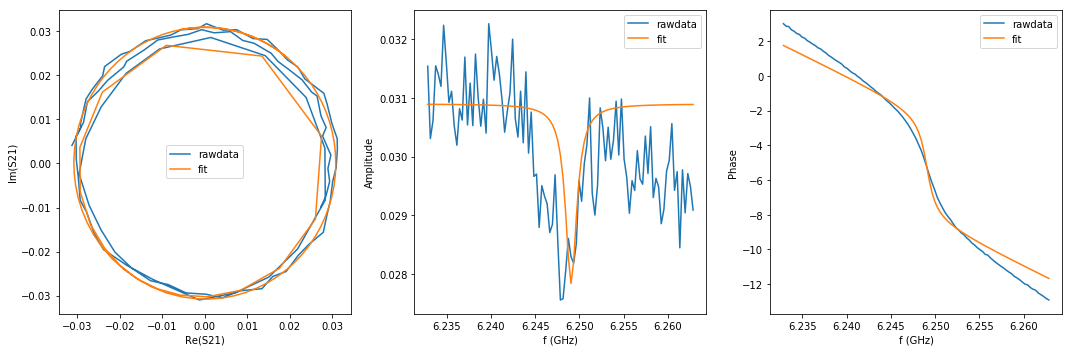

In [173]:
        real = S21.real
        imag = S21.imag
        real2 = S21_sim.real
        imag2 = S21_sim.imag
        fig = plt.figure(figsize=(15,5))
        fig.canvas.set_window_title("Resonator fit")
        plt.subplot(131)
        plt.plot(real,imag,label='rawdata')
        plt.plot(real2,imag2,label='fit')
        plt.xlabel('Re(S21)')
        plt.ylabel('Im(S21)')
        plt.legend()
        plt.subplot(132)
        plt.plot(Frequency*1e-9,np.absolute(S21),label='rawdata')
        plt.plot(Frequency*1e-9,np.absolute(S21_sim),label='fit')
        plt.xlabel('f (GHz)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.subplot(133)
        plt.plot(Frequency*1e-9,np.unwrap(np.angle(S21)),label='rawdata')
        plt.plot(Frequency*1e-9,np.unwrap(np.angle(S21_sim)),label='fit')
        plt.xlabel('f (GHz)')
        plt.ylabel('Phase')
        plt.legend()
        # plt.gcf().set_size_inches(15,5)
        plt.tight_layout()
        plt.show()

In [174]:
fig.savefig("Fitting.png")

# Определение резонансной частоты с помощью функции Лоренца

In [189]:
step=Frequency[1]-Frequency[0]

Примерная резонансная частота 6249050000.0


Text(0, 0.5, 'Delay')

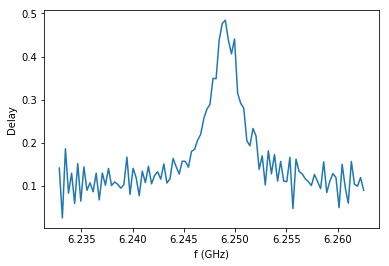

In [229]:
max_idx = np.argmax(abs(np.diff(np.unwrap(np.angle(S21)))))
fr=Frequency[max_idx]
print('Примерная резонансная частота',fr)
fig = plt.figure(figsize=(6,4))
plt.plot(Frequency[:-1]*1e-9, abs(np.diff(np.unwrap(np.angle(S21)))))
plt.xlabel('f (GHz)')
plt.ylabel('Delay')

In [230]:
fig.savefig("Lor1.png")

Text(0, 0.5, 'Delay')

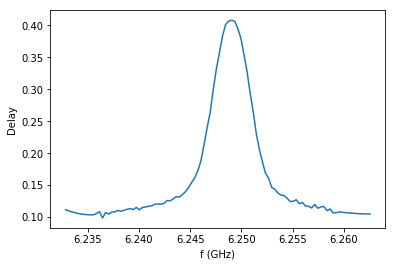

In [231]:
NewResult=abs(np.diff(savgol_filter(np.unwrap(np.angle(S21)),21,3)))
fig = plt.figure(figsize=(6,4))
plt.plot(Frequency[:-1]*1e-9, NewResult)
plt.xlabel('f (GHz)')
plt.ylabel('Delay')

In [232]:
fig.savefig("Lor2.png")

In [219]:
def lorentzian(f, f_r, width, A, offset):
    return A * width**2 /((f-f_r)**2+width**2) + offset

In [220]:
p0 = (Frequency[np.argmax(NewResult)], 5e6, ptp(NewResult), 0)

In [221]:
p_opt, cov = curve_fit(lorentzian, Frequency[:-1], NewResult, p0 = p0)

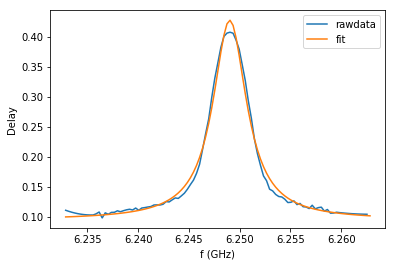

In [235]:
fig = plt.figure(figsize=(6,4))
plt.plot(Frequency[:-1]*1e-9, NewResult, label='rawdata')
plt.plot(Frequency*1e-9, lorentzian(Frequency, *p_opt), label='fit')
plt.xlabel('f (GHz)')
plt.ylabel('Delay')
plt.legend()
plt.show()

In [236]:
fig.savefig("Lorentzian.png")

In [224]:
print('Резонансная частота:',p_opt[0]*1e-9,'GHz')

Резонансная частота: 6.249022741089443 GHz


# Фитирование фазы и определение резонансной частоты с помощью функции арктангенса

In [249]:
def Func(x,theta0, Ql, fr, slope):
    return theta0+2.*np.arctan(2.*Ql*(1.-x/fr))-slope*x

In [250]:
p1 = (0, 900,fr,0)

In [254]:
p_opt, cov = curve_fit(Func,Frequency, np.unwrap(np.angle(S21)), p0 = p1)
print('Резонансная частота', p_opt[2]*1e-9,'GHz')

Резонансная частота 6.24916284769938 GHz


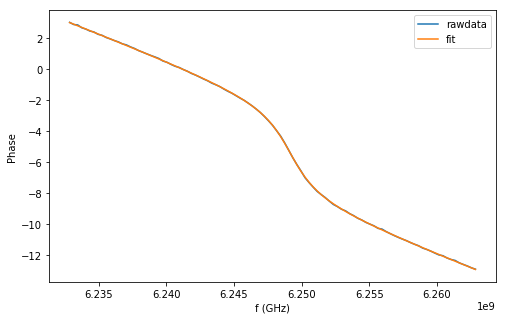

In [252]:
fig = plt.figure(figsize=(8,5))
plt.plot(Frequency, np.unwrap(np.angle(S21)), label='rawdata')
plt.plot(Frequency, Func(Frequency,*p_opt),label='fit')
plt.xlabel('f (GHz)')
plt.ylabel('Phase')
plt.legend()
plt.show()

In [253]:
fig.savefig("Arctg.png")

# Использование unwrap

In [30]:
phase = np.linspace(0, np.pi, num=5)

In [32]:
print(phase)

[0.         0.78539816 1.57079633 2.35619449 3.14159265]


In [34]:
phase[3:] += np.pi

In [35]:
print(phase)

[0.         0.78539816 1.57079633 5.49778714 6.28318531]


In [33]:
np.unwrap(phase)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

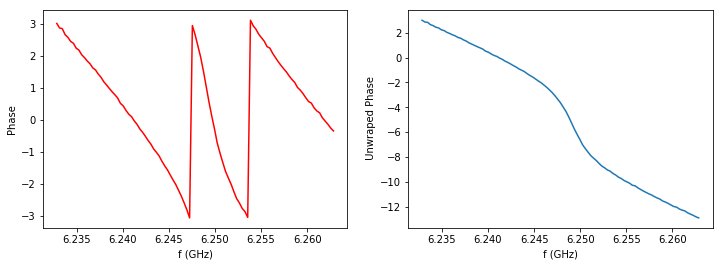

In [44]:
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Frequency*1e-9, np.angle(S21), c='r')
#plt.plot(Frequency, savgol_filter(abs(S21),21,3))
plt.xlabel('f (GHz)')
plt.ylabel('Phase')
#plt.title('Зависимость амплитуды от частоты')        
plt.subplot(122)
plt.plot(Frequency*1e-9, np.unwrap(np.angle(S21)))
#plt.plot(Frequency, np.angle(S21))
plt.xlabel('f (GHz)')
plt.ylabel(' Unwraped Phase')
#plt.title('Зависимость фазы от частоты')
plt.show()

In [45]:
fig.savefig("Unwraped_Phase.png")